## Introduction

Data visualization is an important part of being able to explore dataset and show results to people with no technical background in a straightforward way. In the python world, there are multiple options for visualizing your data such as Matplotlib,  vispy, ggplot, bokeh, seaborn, pygal, plotly, etc.

This tutorial will introduce you to three popular virtualization libraries in python – Seaborn, bokeh and plotly. I will use two real-world datasets to  illustrates how to use each of the libraries to make visualizations. In the end I will compare these libraries and discuss what areas each library is best in so that we can figure out which one to use when.

### Tutorial content

In this tutorial, I will show how to do some basic data virtulization in Python, specifically using [Seaborn](http://seaborn.pydata.org/), [bokeh](https://bokeh.pydata.org/en/latest/), and [plotly](https://plot.ly/python/).

I'll be using data collected from Western Pennsylvania Regional Data Center: 
- Police Incident Blotter (30 Day): https://data.wprdc.org/dataset/police-incident-blotter (crime.csv)
- Allegheny County Crash Data: https://data.wprdc.org/dataset/allegheny-county-crash-data.  (download the **Cumulative Crash Data (2004-2016)** dataset and save it as all-crashes2004-2016.csv if you want to run any of the cells below)

I will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Data processing](#data-preperation)
- [Virtulization with Seaborn](#Seaborn)
- [Virtulization with Bokeh](#Bokeh)
- [Virtulization with Plotly](#Plotly)
- [Comparision and conclusion](#Comparision-and-Conclusion)
- [Further resources and references](#Further-resources-and-References)

## Installing the libraries

Before getting started, you'll need to install the libraries that I will use. 

    conda install seaborn 
    conda install bokeh
    conda install plotly
    sudo pip install colorlover

After you run all the installs, make sure the following import commands work for you (Note that also some commands at the beginning of [Seaborn](#Seaborn), [Bokeh](#Bokeh) and [Plotly](#Plotly)):

Also, I used two api in this turorial. You need to replace with you own api key in order to run the cells correctly.
- Google map api key: get your own api-key on https://developers.google.com/maps/documentation/javascript/get-api-key
Then put your own api-key in this cell [Visualization for 3D data with bokeh](#Visualization-for-3D-data)

- To use plotly, you need to create a free account on [plotly](https://plot.ly/python/) first. Then, get your own api-key on https://plot.ly/settings/api.
set the credentials and replace with your username and api-key in this cell [set credential](#Generate-api-key-and-set-credentials):

**notice: In case you might not be able to see the plots in section [Bokeh](#Bokeh) and [Plotly](#Plotly) if you do not run any cell, I put a screenshot below every cell. If you want to see the interactive graphs, please install the librabies, replace two api-keys and then run all the cells as I mention before.**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## data preperation

After installed and loaded the libraries, let's download cvs files of the two datasets from the website I mentioned above. You need to put all the files in the same directory in order to properly load the data.

After observation of two dataset, I load data into two pandas dataframes and did some basic data processing in order to plot more effectively.

You can see the detail of each dataframe below:

In [31]:
# Load data from csv file
crimes = pd.read_csv("crime.csv")
# processing and generate a new dataframe - crimes_area_count
crimes_area_count = crimes.groupby('INCIDENTNEIGHBORHOOD')['INCIDENTNEIGHBORHOOD'].count().reset_index(name="count")
crimes_area_count = crimes_area_count.sort_values(by=['count'], ascending = False)
print(crimes_area_count.head())
# add four column into crimes dataframe
crimes['Date'] = pd.to_datetime(crimes['INCIDENTTIME'])
crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] = crimes['Date'].dt.month
crimes['Hour'] = crimes['Date'].dt.hour
crimes.head()

         INCIDENTNEIGHBORHOOD  count
16  Central Business District    260
74           South Side Flats    193
15                    Carrick    125
28               East Liberty    115
70                  Shadyside     80


,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Date,Year,Month,Hour
0,1,173911934,18043229,10,2018-03-07T11:11:00,"900 Block Berkshire Ave Pittsburgh, PA 15226",Y,Brookline,6,HARRASSMENT,2709 Harassment (Non-Specific),1918.0,NaN,NaN,0.000000,0.000000,2018-03-07 11:11:00,2018,3,11
1,2,-3025023287,18030094,99,2018-02-16T09:10:00,"4200 Block 5th Ave Pittsburgh, PA 15213",N,North Oakland,4,INDUSTRIAL ACCIDENT,9491 Industrial Accident,403.0,NaN,NaN,-79.953193,40.444302,2018-02-16 09:10:00,2018,2,9
2,3,173112511,18034373,0,2018-02-22T11:48:00,"Perrysville Ave & Delaware St Pittsburgh, PA 1...",N,Perry North,1,99,8106 Shots Fired,2602.0,NaN,NaN,-80.011790,40.479682,2018-02-22 11:48:00,2018,2,11
3,4,173116418,18034380,0,2018-02-22T12:05:00,"3100 Block Arlington Ave Pittsburgh, PA 15210",N,Arlington Heights,3,99,9999 9999 - (Misc. Incident):,1604.0,NaN,NaN,-79.964106,40.417531,2018-02-22 12:05:00,2018,2,12
4,5,172566354,18028506,10,2018-02-14T01:52:00,"700 Block Johnston Ave Pittsburgh, PA 15207",Y,Glen Hazel,4,SIMPLE ASSAULT,2701 Simple Assault. / 2606(a) Aggravated Assa...,1504.0,NaN,NaN,-79.933411,40.405788,2018-02-14 01:52:00,2018,2,1


In [32]:
crashes = pd.read_csv("all-crashes2004-2016.csv", low_memory=False)
# process data
crashes = crashes.fillna(0)
crashes.head()

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,ACCESS_CTRL,ROADWAY_COUNTY,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME
0,2.004000e+09,11.0,2.0,2454.0,02454,2004.0,1.0,5.0,257.0,2.0,...,3.0,2.0,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD
1,2.004000e+09,11.0,2.0,2440.0,02440,2004.0,1.0,5.0,1027.0,10.0,...,0.0,2.0,2.0,W,3.0,0,35.0,0.0,0.0,COAL VALLEY RD
2,2.004000e+09,11.0,2.0,2203.0,02203,2004.0,1.0,5.0,1839.0,18.0,...,0.0,2.0,2.0,W,2.0,3082,35.0,0.0,0.0,CLINTON FRANKFORT RD
3,2.004000e+09,11.0,2.0,2404.0,02404,2004.0,1.0,6.0,914.0,9.0,...,0.0,2.0,2.0,N,4.0,0,25.0,0.0,0.0,NORTH BALPH AV
4,2.004000e+09,11.0,2.0,2419.0,02419,2004.0,1.0,5.0,2230.0,22.0,...,0.0,2.0,2.0,S,4.0,0,20.0,0.0,0.0,THORNBERRY DR


## Seaborn

In [33]:
import seaborn as sns

Seaborn is  a higher-level plotting library for Python which builds on matplotlib. With Seaborn we can many types of plots easily with a short length of code especially for plot related to statistical work. It seeks to make default data visualizations much more attractive with color palettes and controlling figure aesthetics. It also has the goal of making more complicated plots simpler to create. 

### Visualization for 1D data

#### basic setting

Before plotting, we can first set the fugure size with one single line.

In [34]:
sns.set(rc={"figure.figsize": (10, 10)})

#### count plot

Want to see the count of each unique element of one dataset? You can just pass your array of data to counterplot, no other setting needed. 

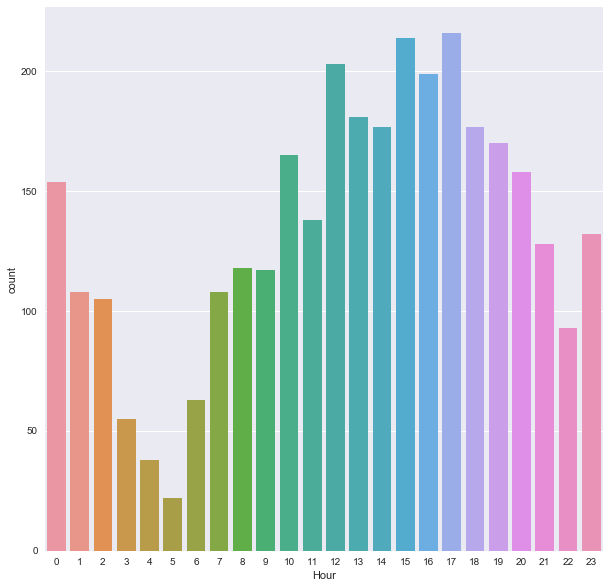

In [35]:
g0 = sns.countplot(crimes['Hour'])

#### dist plot

We can use the distplot function to plot a histogram with a kernel density estimate on top of it. A kernel density estimate is a curve -- essentially a smoothed version of the histogram that's easier to see patterns in.

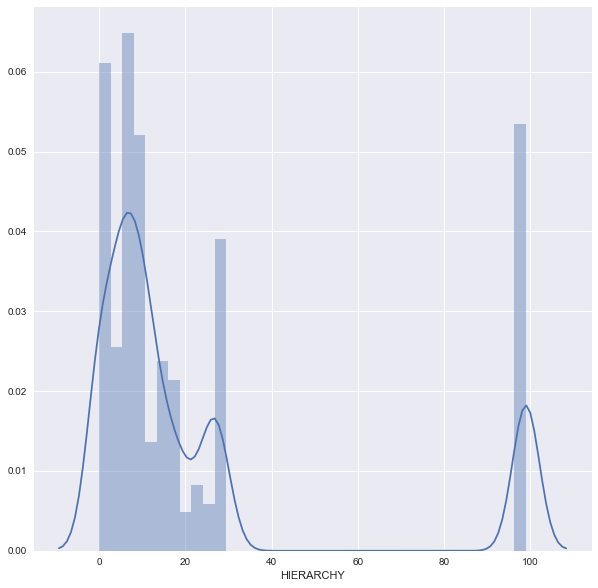

In [36]:
g1 = sns.distplot(crimes["HIERARCHY"])

### Virtulization for 2D data

#### bar plot

Virtulization for 2D data is as simple as 1D data, you only need to set figure size and pass two array of data into different plot.

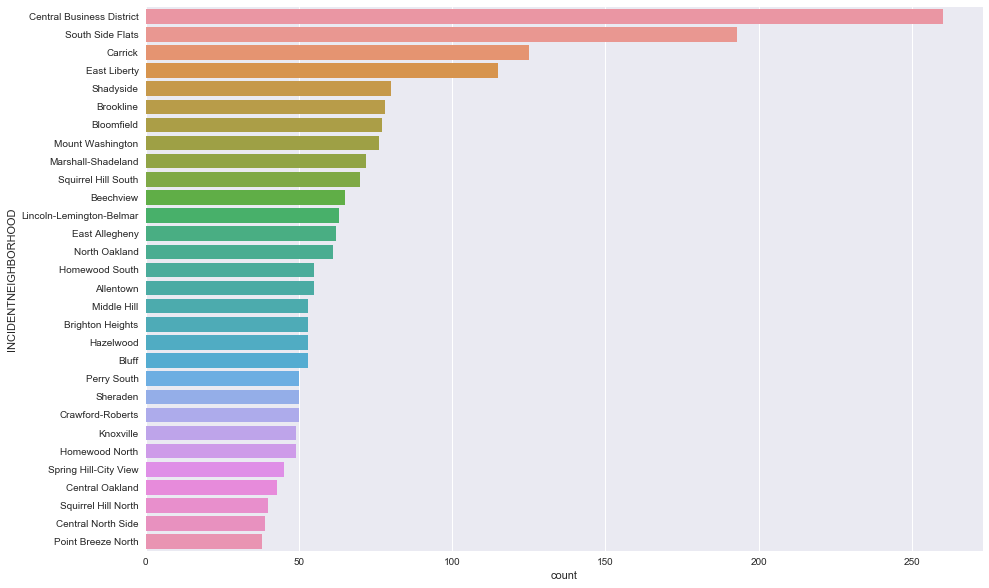

In [37]:
sns.set(rc={"figure.figsize": (15, 10)})
g = sns.barplot(x = "count",y = "INCIDENTNEIGHBORHOOD", data = crimes_area_count[:30])

#### kdeplot

Below is an example of set color palette of a fugure and use kdeplot to fit and plot a univariate or bivariate kernel density estimate.

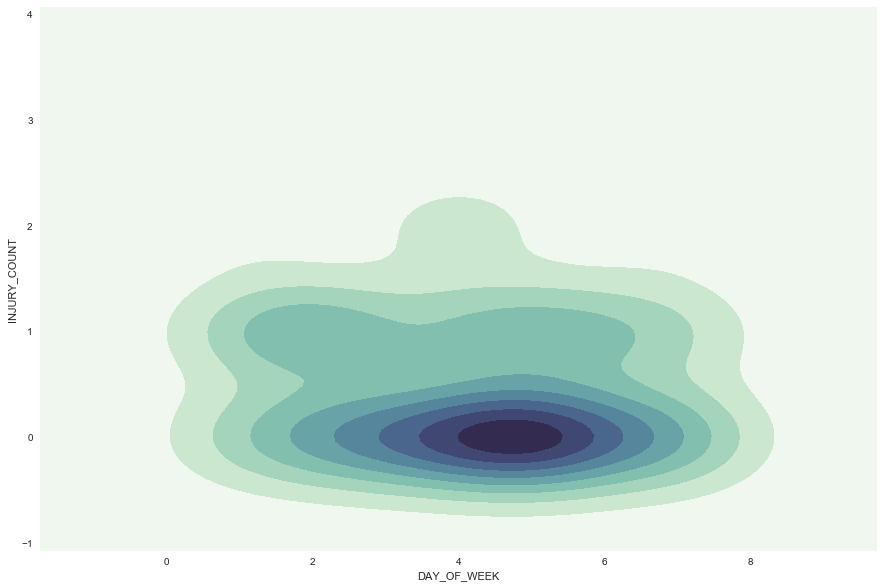

In [38]:
x = crashes['DAY_OF_WEEK'][:50]
y = crashes['INJURY_COUNT'][:50]
cmap = sns.cubehelix_palette(light=1, start=.4, rot=-.55, as_cmap=True)
g1 = sns.kdeplot(x, y, cmap=cmap, shade=True)

### Virtulization for 3D data

#### heat map

Below is an example of plotting 3D data with seaborn. I first group data by month and day of week and then passing it to heatmap object.

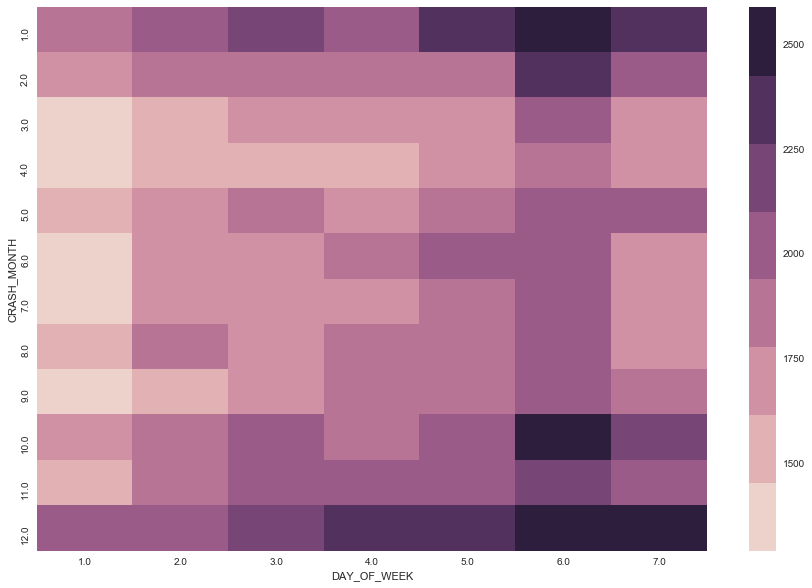

In [39]:
test = crashes.groupby([crashes['CRASH_MONTH'],crashes['DAY_OF_WEEK']],as_index=False).count()
new = test[['CRASH_MONTH','DAY_OF_WEEK','CRASH_CRN']]
temp = new.iloc[:200,:]
temp = temp.pivot('CRASH_MONTH','DAY_OF_WEEK','CRASH_CRN')
g2 = sns.heatmap(temp,cmap=sns.cubehelix_palette(8))

#### Scatter plot matrix

Sometimes, we want to see the correlation between each two of a set of attributes, here is an example of pairplot. Choose the columns you want to plot and here you go.

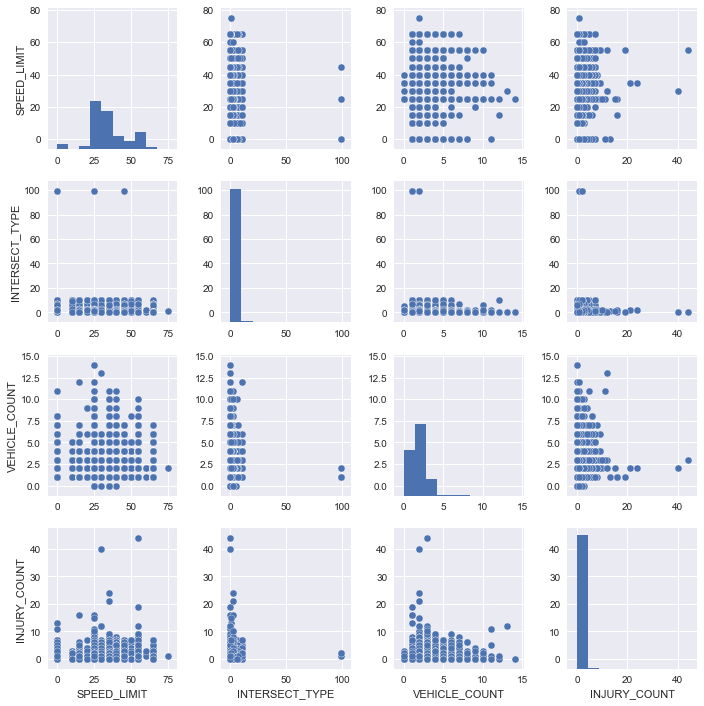

In [40]:
g = sns.pairplot(crashes[["SPEED_LIMIT",'INTERSECT_TYPE','VEHICLE_COUNT','INJURY_COUNT']])

## Bokeh


Bokeh is different with seaborn, it does not depend on matplotlib and it is geared toward generating visualizations in modern web browsers. It aims to makes it simple to make interactive, zoomable web visualizations.

In [41]:
# bokeh
from bokeh.plotting import *
from bokeh.layouts import gridplot
from bokeh.models import *
from bokeh.models.mappers import ColorMapper, LinearColorMapper
import bokeh.palettes as bp
from bokeh.resources import INLINE
from bokeh.io import output_notebook, show
output_notebook(resources=INLINE)
# output_notebook()

Loading BokehJS ...

### Visualization for 1D data

#### line plot

Here is an example of plot 1D data. We first create a new plot with a title and axis labels or other kinds of attributes. Then we can add a line renderer with the data of x, y axis, lengend, line thickness or other kind of attributes you want to specify. If you want the figure to be more interative, add tools to this plot. In the following plot, you can see the exact number of y axis when you move the pointer on it.

In [42]:
x = np.linspace(0, 20, 20)
# create a new plot (with a title) using figure
p = figure(plot_width=400, plot_height=400, title="Line Plot Example")
# add a line renderer
p.line(x, y = crimes["HIERARCHY"][:20], line_width=2, legend="incident hierrarchy")
p.add_tools(HoverTool(tooltips=[("number", "@y")]))
show(p) # show the results

Here is the screenshot of correct output the cell:
![](bokeh_1d.png)

### Visualization for 2D data

#### bar plot

For 2D data you follow the same step as before, just change the data add necessary attributes. 

From the following we can see the number of crimes that happen in each neighborhood.

In [43]:
INCIDENTNEIGHBORHOOD = list(crimes_area_count['INCIDENTNEIGHBORHOOD'][:30])
p = figure(y_range=INCIDENTNEIGHBORHOOD,plot_width=800, 
           plot_height=500, title="Incident count by area")
p.hbar(y=INCIDENTNEIGHBORHOOD, right=list(crimes_area_count['count'][:30]), 
       height=0.8,left=0, color=bp.Viridis256[40:70])
p.add_tools(HoverTool(tooltips=[("incident number", "@right")]))
show(p)

Here is the screenshot of correct output the cell:
![](bokeh_2d1.png)

#### combine multiple plots

We can also combine multiple renderers together into one plot. Bokeh also provides many marker types like circle, cross, square, etc. You can see more detail in the reference guide

In [44]:
p = figure(width=500, height=500)
source = ColumnDataSource(crashes.iloc[:200])
p.triangle('SPEED_LIMIT', 'INJURY_COUNT',size=10, alpha=0.3,
           color="blue", legend="Injury count", source=source)
p.circle('SPEED_LIMIT', 'FATAL_COUNT', size=10, alpha=0.3,
         color="red", legend="Fatal count", source=source)
p.legend.location = "top_left"
show(p)

Here is the screenshot of correct output the cell:
![](bokeh_2d2.png)

#### Linked panning and brushing¶
As you can see,there is three plot in the following example, when you move or zoom one plot, the others will update at the same time because they are linked panning and they sharing some plot component between plots. 


In [45]:
# prepare some data
N = 100
x = crashes['DAY_OF_WEEK'][:50]
y0 = crashes['WEATHER'][:50]
y1 = crashes['ROAD_CONDITION'][:50]
y2 = crashes['COLLISION_TYPE'][:50]

# create a new plot
s1 = figure(width=250, plot_height=250, title="weather")
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# NEW: create a new plot and share both ranges
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title="road condition")
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# NEW: create a new plot and share only one range
s3 = figure(width=250, height=250, x_range=s1.x_range, title="collision type")
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2, s3]], toolbar_location='left')
# show the results
show(p)

Here is the screenshot of correct output the cell:
![](bokeh_2d3.png)

### Visualization for 3D data

#### plot data on map

Different with other libraries, Bokeh provides a module for Google Maps which will feel very familiar to most people. You can specify the attributes of renderer first, passing your API_key to plot object and your data will appear on map.

In the following example, I'm plotting each of the crimes location on map with x, y axis data. What's more I translate hierarchy into different color with color_mapper. For more detailed information see reference.

**For the cell below you need to have your own GOOGLE_API_KEY to generate the plot correctly, to get your own api-key go to https://developers.google.com/maps/documentation/javascript/get-api-key**

In [46]:
map_options = GMapOptions(lat=40.444302, lng=-79.953193, map_type="roadmap", zoom=11)
plot1 = GMapPlot(x_range=Range1d(), y_range=Range1d(), map_options=map_options)
plot1.title.text = "Pittsburgh crimes map"
# For GMaps to function, Google requires you obtain and enable an API key:
#     https://developers.google.com/maps/documentation/javascript/get-api-key
# Replace the value below with your personal API key:
plot.api_key = "GOOGLE_API_KEY"
source = ColumnDataSource(
    data=dict(
        lat=list(crimes['Y']),
        lon=list(crimes['X']),
        color = list(crimes['HIERARCHY']), # .tolist()
    )
)
color_mapper = LinearColorMapper(palette=bp.brewer['YlOrRd'][9][2:])
circle = Circle(x="lon", y="lat", size=5, fill_color={'field': "color", 'transform': color_mapper}, fill_alpha=0.8, line_color=None)
plot1.add_glyph(source, circle)
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),label_standoff=12, border_line_color=None, location=(0,0))
plot1.add_layout(color_bar, 'right')
plot1.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
show(plot1)

Here is the screenshot of correct output the cell:

![](bokeh_map.png)

## Plotly

In [47]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *
import colorlover as cl
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

### Generate api key and set credentials


Before getting started, you need to create a free account on [plotly](https://plot.ly/python/) first.All graphs will be saved inside your online Plotly account and you can control the privacy for paid plan. 

Since we has installed the Plotly package, let's set the credentials.

**For the cell below you should**
- **sign up free on [plotly](https://plot.ly/python/)**
- **replace with your username and [API KEY](https://plot.ly/settings/api):**

In [48]:
plotly.tools.set_credentials_file(username='DemoAccount', api_key='YOUR_API_KEY')

### Show table

For the following example, I will use raw dataframe directly. 

You can also upload a Dataframe as well as convert it to raw data as a grid:

In [49]:
table = ff.create_table(crashes.iloc[:,0:10].iloc[:10])
offline.iplot(table)

Here is the screenshot of correct output the cell:

![](plotly1.png)

### Virtulization for 1D data

We can use Plotly's python API to plot inside Jupyter Notebook by calling plotly.plotly.iplot() or plotly.offline.iplot() if working offline. 
Usually we need to specify the data of each dimension and also add layout attributes (titles) to figure, then an interactive version of the plot will be generated inside the Notebook.

Below is the hierarchy of a plotly figure: ( in which {} = dictionary, [] = list, ABC = string, 123 = number))
![](figure.png)

For commonly used simple plot we only need to add data of x, y axis to trace and specified the plot type:

Below is a basic Histogram example:

In [50]:
x = crimes['INCIDENTNEIGHBORHOOD']
# add x axis data to trace
data = [Histogram(x=x)]
layout = Layout(
    title='Histogram of incident neighborhood',
    yaxis=dict(
        title='Count'
    )
)
fig = Figure(data=data, layout=layout)
offline.iplot(fig)

Here is the screenshot of correct output the cell:

![](plotly11.png)

### Virtulization for 2D data

#### Scatter plot

Now, let's virtuliza 2D data by passing x, y to trace. To make scatter looks better, we can also pass marker attributes like size of each data point and colorscale.

From the plot below, we can see the distribution of accident hierarchy and also the distribution on each neighborhood.

In [51]:
trace1 = Scatter(
    x = crimes['INCIDENTNEIGHBORHOOD'][:200],
    y = crimes['HIERARCHY'][:200],
    mode='markers',
    marker=dict(
        size='16',
        color = np.linspace(0, 200, 200),
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]
#On executing the script, it will save this plot in temp-plot.html and you can see the interactive plot in web browser
url_1 = offline.plot(data,auto_open=False)
offline.iplot(data)

Here is the screenshot of correct output the cell:

![](plotly21.png)

#### Stacked Bar Chart

Sometimes, we want to put multiple plots in one figure. In plotly, we can simply define multiple traces and pasiing all of them to data object.

In the crashes dataset, it contains the count of drivers in different age. Therefore, we can plot all of the age groups in one figure to see the distribution. By moving cursor to the figure, the number of each group will display automatically.

In [52]:
crashes1 = crashes.groupby(['DAY_OF_WEEK'],as_index=False).sum()
x = crashes1['DAY_OF_WEEK']
ryb = cl.scales['10']['div']['RdYlBu']
trace1 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_16YR'],
  'name': '16YR',
  'type': 'bar',
    'marker':dict(color=ryb[0],)
};
trace2 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_17YR'],
  'name': '17YR',
  'type': 'bar',
    'marker':dict(color=ryb[1],)
};
trace3 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_18YR'],
  'name': '18YR',
  'type': 'bar',
    'marker':dict(color=ryb[2],)
 }
 
trace4 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_19YR'],
  'name': '18YR',
  'type': 'bar',
    'marker':dict(color=ryb[3],)
 }
trace5 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_20YR'],
  'name': '20YR',
  'type': 'bar',
    'marker':dict(color=ryb[4],)
 }
trace6 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_50_64YR'],
  'name': '50-64YR',
  'type': 'bar',
    'marker':dict(color=ryb[5],)
 }
trace7 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_65_74YR'],
  'name': '65-74YR',
  'type': 'bar',
    'marker':dict(color=ryb[6],)
 }
trace8 = {
  'x': x,
  'y': crashes1['DRIVER_COUNT_75PLUS'],
  'name': '75 PLUS YR',
  'type': 'bar',
    'marker':dict(color=ryb[7],)
 }
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8];
layout = {
  'xaxis': {'title': 'Day of week'},
  'yaxis': {'title': 'Number of Driver'},
  'barmode': 'relative',
  'title': 'Driver age distribution'
};
offline.iplot({'data': data, 'layout': layout})

Here is the screenshot of correct output the cell:

![](plotly22.png)

### Virtulization for 3D data

#### Heatmap

Below is an example of plotting 3D data. I first group data by month and day of week.

To plot 3D data, you only need to define x, y, z in one trace and passing it to data object.

In [53]:
test = crashes.groupby([crashes['CRASH_MONTH'],crashes['DAY_OF_WEEK']],as_index=False).count()
new = test[['CRASH_MONTH','DAY_OF_WEEK','CRASH_CRN']]
temp = new.iloc[:200,:]

In [54]:
trace = Heatmap(z= temp.CRASH_CRN,x=temp.DAY_OF_WEEK,y=temp.CRASH_MONTH)
data=[trace]
layout = {
  'xaxis': {'title': 'Day of week'},
  'yaxis': {'title': 'Month'},
  'title': 'CRASH CRN on day of week of each month'
};
offline.iplot({'data': data, 'layout': layout})

Here is the screenshot of correct output the cell:

![](plotly31.png)

#### Plotting Interactive Maps

In this example, I will plot crimes data of pittsburgh on map since it include both latitude and longitude.
Also I seperated the data into three categories by the accident's hierarchy and plot it with different color.

In [55]:
limits = [(0,15),(16,29),(30,100)]
colors = cl.scales['3']['div']['RdYlGn']
df = crimes
df['text'] = 'Hierarchy: ' + df['HIERARCHY'].astype(str)
cities = []
scale = 5000
for i in range(len(limits)):
    lim = limits[i]
    df_sub = df.loc[(df['HIERARCHY'] >= lim[0]) & (df['HIERARCHY'] <= lim[1])]
    city = Scattermapbox(
        lon = df_sub['X'],
        lat = df_sub['Y'],
        text = df_sub['text'],
        mode='markers',
        marker=Marker(
            color = colors[i],
            size=9
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) 
    )
    cities.append(city)   
data = Data(cities)
layout = Layout(
    title = 'Pittsburgh crime map and hierarchy<br>(Click legend to toggle traces)',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        bearing=0,
        center=dict(
            lon = -79.953193, lat = 40.444302
        ),
        pitch=0,
        zoom=10
    ),
)
fig = dict(data=data, layout=layout)
# give figure a filename and it will be saved in your plotly account
py.iplot(fig, filename='pittsburgh crime map')

Here is the screenshot of correct output the cell:

![](plotly32.png)

## Comparision and Conclusion

I only mentioned three libraries here due to the length limitation. Since each libraries has it own strength, it's hard to say which one is the clear winner since it largely depends on what you’re trying to accomplish and it's better for you to try and figure out which one works for you. 

Here is a few of my thought based on my own experiment:

**Seaborn** can support complex visualization for numeric data with short length of code but it still requires matplotlib knowledge to tweak. The color schemes are easy to use and it's a nice bonus.If your data is all numeric without categorized data, you might want to consider using Seaborn because the code of it is much concise than others.

**Bokeh** is a robust tool for interactive plot overall and, as they promised, the code is concise even for complicated figure, but I think it might take some times for beginner to learn and the document is a little out of data without much explanation。

**Plotly** generates the most interactive graphs among all the three libraries. The document of plotly is good and provide many examples. Although the code might looks much longer than others, the structure of figure and data object is very clear. You only need to passing the data in that structure and plotly will provide interactive tools for you unlike bokeh by which you have to add tool bar by yourself.

## Further resources and References

Much more detail about the three libraries are available from the following links.

1. Seaborn https://seaborn.pydata.org/
2. Bokeh https://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html#plot
3. Plotly python libraries https://plot.ly/python/
4. Plotly python cheat sheet https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf
5. Python data visualization: Comparing 7 tools https://www.dataquest.io/blog/python-data-visualization-libraries/
6. Overview of Python Visualization Tools http://pbpython.com/visualization-tools-1.html
7. How to plot data on maps in Jupyter using Matplotlib, Plotly, and Bokeh http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/